In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import re
import matplotlib.pyplot as plt
import datetime

# Background
### You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, has asked us to test the impact of the new trial layouts with a data driven recommendation to whether or not the trial layout should be rolled out to all their stores.

## Examining the performance in trial vs control stores 

In [2]:
control = pd.read_csv('control stores.csv')
trail = pd.read_csv('trail stores.csv')
control.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,17/10/2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,16/09/2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,7/03/2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,8/03/2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2/11/2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


# Trail stores and Control stores 

In [3]:
trail.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,3.974000e+03,3974.000000,3.974000e+03,3974.000000,3974.000000,3974.000000,3974.000000
mean,1.040920e+05,85.667589,8.698404e+04,55.238802,1.926522,7.551233,180.395823
std,1.988414e+05,3.640526,4.002005e+04,32.920617,0.324572,2.438625,64.211425
min,7.700000e+04,77.000000,7.491000e+04,1.000000,1.000000,1.500000,70.000000
25%,8.607500e+04,86.000000,8.459625e+04,28.000000,2.000000,6.000000,150.000000
50%,8.624000e+04,86.000000,8.561550e+04,52.000000,2.000000,7.600000,170.000000
75%,8.819200e+04,88.000000,8.717075e+04,83.000000,2.000000,9.200000,175.000000
max,2.373711e+06,88.000000,2.415841e+06,114.000000,5.000000,25.500000,380.000000


In [4]:
control.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,260860.000000,260860.000000,260860.000000,260860.000000,260860.000000,260860.000000,260860.000000
mean,136028.012788,135.832174,135891.510519,56.604040,1.905497,7.295509,182.456433
std,77295.238582,77.120990,78341.999796,32.824644,0.343706,2.528377,64.326507
min,1000.000000,1.000000,1.000000,1.000000,1.000000,1.500000,70.000000
25%,69119.000000,69.000000,66585.750000,28.000000,2.000000,5.400000,150.000000
50%,133167.000000,133.000000,137091.500000,56.000000,2.000000,7.400000,170.000000
75%,203330.000000,203.000000,203680.250000,85.000000,2.000000,9.200000,175.000000
max,883791.000000,272.000000,270209.000000,114.000000,5.000000,29.500000,380.000000


### Based on the information above. The mean of trail stores are higher than control stores, so it is worthy to look at trail stores data to know what factors influence the high sales in trail stores.  

# Trail sotres analysis

In [5]:
totalsales = trail.groupby(['STORE_NBR']).sum()
totalsales

,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
STORE_NBR,,,,,,
77,88553065,45560607,32362,872,3040.00,100649
86,134669027,132834079,86923,3066,10635.35,272831
88,190439625,167279872,100234,3718,16333.25,343413


## Store 77

In [7]:
store77= trail[trail['STORE_NBR'] == 77]
store77['DATE'] = pd.to_datetime(store77['DATE']) # change DATE datatype to datetime

<ipython-input-7-97a3e28d2d44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store77['DATE'] = pd.to_datetime(store77['DATE']) # change DATE datatype to datetime


### Based on the chart below, the sells boosted from 8/2018 to 8/2019 and then droped from 9/2019. The sales were lower in Nov and March, which could be influenced by seasons. During summer season, the sales is higher than others, but the average sales remained higher than 150. 

<AxesSubplot:xlabel='DATE', ylabel='TOT_SALES'>

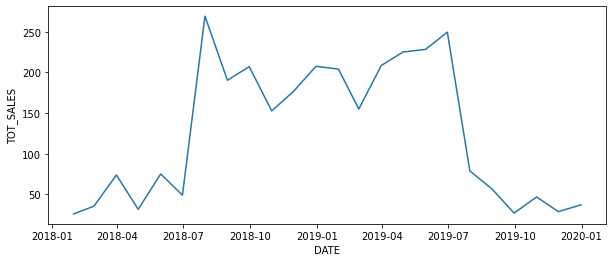

In [8]:
monthly77= store77.groupby(pd.Grouper(key='DATE', freq='1M')).sum()
# groupby by monthly data 
plt.figure(figsize=(10,4))
sns.lineplot(x='DATE',y='TOT_SALES',data=monthly77)

In [9]:
cate77= store77[['BRAND','PACK_SIZE','PREMIUM_CUSTOMER','PROD_QTY']]
cate77.value_counts()
# store 77 cateorical data summary

BRAND       PACK_SIZE  PREMIUM_CUSTOMER  PROD_QTY
KETTLE      175        Mainstream        1           11
RRD         150        Mainstream        2           10
KETTLE      175        Mainstream        2           10
PRINGLES    134        Budget            2            9
                       Mainstream        2            9
                                                     ..
COBS        110        Mainstream        2            1
                                         4            1
                       Premium           1            1
RRD         165        Premium           2            1
WOOLWORTHS  300        Premium           2            1
Length: 189, dtype: int64

### 175 and 150 package size are the most popula with more mainstream customers. Budeget customers would tend to buy large package 

<AxesSubplot:xlabel='PACK_SIZE', ylabel='count'>

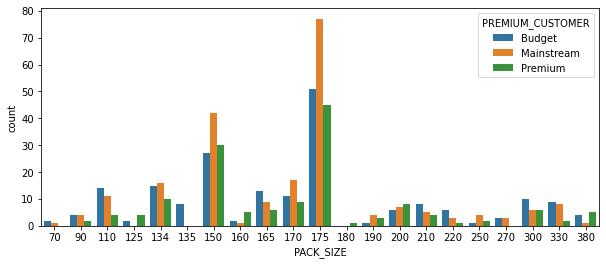

In [10]:
plt.figure(figsize=(10,4))
sns.countplot(x='PACK_SIZE',hue='PREMIUM_CUSTOMER',data=cate77)
# 1

### SMITHS, KETTLE, RRD, woolworths, doritos and pringles are the most popular brand in store77

In [11]:
cate77['BRAND'].value_counts()

SMITHS        90
KETTLE        73
RRD           51
WOOLWORTHS    49
DORITOS       44
PRINGLES      41
THINS         28
NATURAL       25
INFUZIONS     20
TOSTITOS      19
CCS           19
GRNWVES       18
TWISTIES      13
COBS          12
OLD           11
TYRRELLS      10
SUNBITES      10
CHEEZELS      10
BURGER        10
FRENCH         6
CHEETOS        4
Name: BRAND, dtype: int64

## Store 86

In [12]:
store86 = trail[ trail['STORE_NBR'] == 86]
store86['DATE'] = pd.to_datetime(store86['DATE']) # change DATE datatype to datetime
monthly86= store86.groupby(pd.Grouper(key='DATE', freq='1M')).sum()

<ipython-input-12-4c250d8c32cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store86['DATE'] = pd.to_datetime(store86['DATE']) # change DATE datatype to datetime


### The sells boosted from 7/2018 to 8/2019 and then droped from 9/2019. It seems like the season did not influence too much in store86 since there is no seasonality based on the chart. The average sale is more than 500 and Sep had lower sales in both 2018 and 2019. 

<AxesSubplot:xlabel='DATE', ylabel='TOT_SALES'>

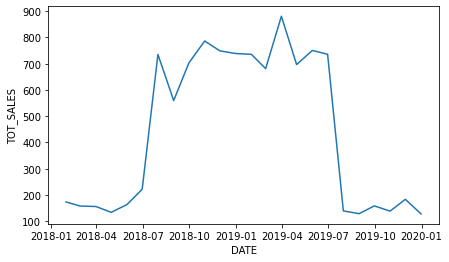

In [13]:
plt.figure(figsize=(7,4))
sns.lineplot(x='DATE',y='TOT_SALES',data=monthly86)


In [14]:
cate86= store86[['BRAND','PACK_SIZE','PREMIUM_CUSTOMER','PROD_QTY']]
cate86.value_counts()

BRAND       PACK_SIZE  PREMIUM_CUSTOMER  PROD_QTY
KETTLE      150        Mainstream        2           44
PRINGLES    134        Mainstream        2           40
RRD         150        Mainstream        2           38
            165        Mainstream        2           35
NATURAL     175        Mainstream        2           35
                                                     ..
SMITHS      150        Mainstream        1            1
RRD         165        Premium           4            1
TYRRELLS    165        Budget            4            1
CHEETOS     190        Budget            3            1
WOOLWORTHS  300        Premium           5            1
Length: 160, dtype: int64

### 175 and 150 pack size are the most popular. 

<AxesSubplot:xlabel='PACK_SIZE', ylabel='count'>

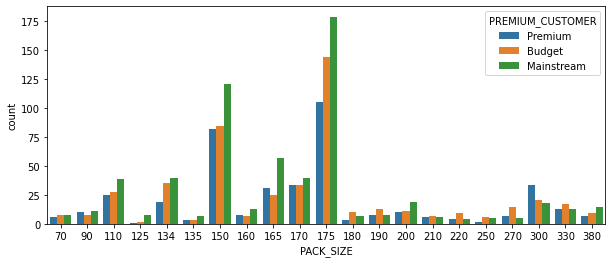

In [15]:
plt.figure(figsize=(10,4))
sns.countplot(x='PACK_SIZE',hue='PREMIUM_CUSTOMER',data=cate86)

## Store 88

In [17]:
store88 = trail[ trail['STORE_NBR'] == 88]
store88['DATE'] = pd.to_datetime(store88['DATE']) # change DATE datatype to datetime
monthly88= store88.groupby(pd.Grouper(key='DATE', freq='1M')).sum()

<ipython-input-17-d83890dd0b5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store88['DATE'] = pd.to_datetime(store88['DATE']) # change DATE datatype to datetime


<AxesSubplot:xlabel='DATE', ylabel='TOT_SALES'>

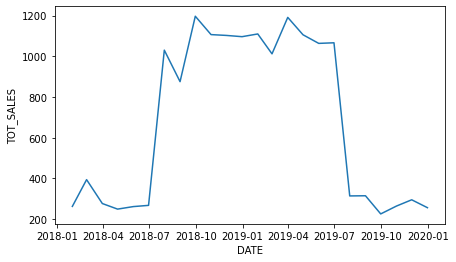

In [18]:
plt.figure(figsize=(7,4))
sns.lineplot(x='DATE',y='TOT_SALES',data=monthly88)

## Summary
### Trail stores can remain high sell during Aug 2018 to July 2019, comparied with control stores. The average sales of trail stores are higher than conrol store in each month and it seems like trail stores are not affected by hoilday seasons, since there is not seasonality feature based on the line charts. 

# Control stores analysis

In [6]:
controlsales = control.groupby(['STORE_NBR']).sum()
controlsales

,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
STORE_NBR,,,,,,
1,720905,170547,32795,704,2393.60,103525
2,1135736,428301,28482,564,2005.80,91909
3,4779490,2814116,82791,2915,12802.45,281769
4,7025622,5862568,91820,3316,14647.65,312407
5,6964664,6888021,78636,2704,9500.80,246378
...,...,...,...,...,...,...
268,146463848,144511666,30445,732,2601.05,97958
269,432483003,427086953,93035,3191,11221.80,289450
270,440291831,435862232,92331,3235,11293.95,299106


## Store 1

In [19]:
control['DATE'] = pd.to_datetime(control['DATE'])
store1=control[control['STORE_NBR'] == 1]
monthly1= store1.groupby(pd.Grouper(key='DATE', freq='1M')).sum()

### There is seasonality in control store where summer season has higher sell and winter as well as spring had lower sales. 

<AxesSubplot:xlabel='DATE', ylabel='TOT_SALES'>

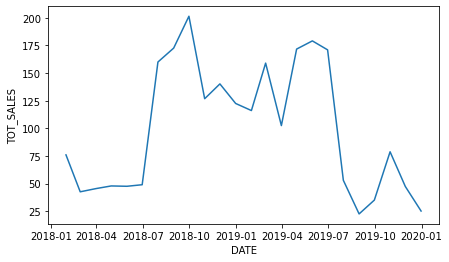

In [20]:
plt.figure(figsize=(7,4))
sns.lineplot(x='DATE',y='TOT_SALES',data=monthly1)


In [21]:
store90=control[control['STORE_NBR'] == 90]
monthly90= store90.groupby(pd.Grouper(key='DATE', freq='1M')).sum()

<AxesSubplot:xlabel='DATE', ylabel='TOT_SALES'>

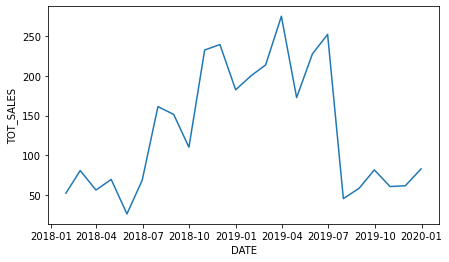

In [22]:
plt.figure(figsize=(7,4))
sns.lineplot(x='DATE',y='TOT_SALES',data=monthly90)